In [1]:
from data_structures import PatientData
from sklearn.base import BaseEstimator
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from typing import Tuple
from sklearn.model_selection import train_test_split
import numpy as np
from dataclasses import dataclass
from typing import Dict, List
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from decoders import DecodingResult, ConceptDecoder, ConceptPairDataset, DecodingResultsManager

todo: imp dropout - add firing rate filter method to patient data to return neurons above threshold, implement by area stuff

In [2]:
p566 = PatientData(pid='566')
p563 = PatientData(pid='563')
p562 = PatientData(pid='562')

./Data/40m_act_24_S06E01_30fps_character_frames.csv
./Data/40m_act_24_S06E01_30fps_character_frames.csv
./Data/40m_act_24_S06E01_30fps_character_frames.csv


In [3]:
p566_filtered_neurons = p566.filter_neurons_by_fr((p566.times_dict['movie_start_rel'], p566.times_dict['preSleep_recall_start_rel']), threshold=0.1)
p563_filtered_neurons = p563.filter_neurons_by_fr((p563.times_dict['movie_start_rel'], p563.times_dict['preSleep_recall_start_rel']), threshold=0.1)
p562_filtered_neurons = p562.filter_neurons_by_fr((p562.times_dict['movie_start_rel'], p562.times_dict['preSleep_recall_start_rel']), threshold=0.1)


In [4]:
concept_pairs_to_decode = []
concept_list = list(p566.movie_df.columns)
#remove non-concept columns if they exist
concept_list = [col for col in concept_list if col not in ['Frame', 'time_sec', 'rel_corrected_time_sec', 'uncorrected_time_sec']]


# doing to 5 for time

for i, concept1 in enumerate(concept_list[:5]):
    for concept2 in concept_list[i+1:5]: #avoid duplicates and self-pairs
        concept_pairs_to_decode.append((concept1, concept2))

print(f"Number of concept pairs to decode: {len(concept_pairs_to_decode)}")
print(concept_pairs_to_decode[:5]) # Print first 5 pairs as example

Number of concept pairs to decode: 10
[('A.Amar', 'A.Fayed'), ('A.Amar', 'B.Buchanan'), ('A.Amar', 'C.Manning'), ('A.Amar', 'C.OBrian'), ('A.Fayed', 'B.Buchanan')]


In [5]:
pseudo_manager = DecodingResultsManager(
    patient_data=p566,
    concept_pairs=concept_pairs_to_decode,
    epoch='movie',
    standardize=False,
    pseudo=True,
    neurons=p566_filtered_neurons
    # no kwargs -> default
)

normal_manager = DecodingResultsManager(
    patient_data=p566,
    concept_pairs=concept_pairs_to_decode,
    epoch='movie',
    standardize=False,
    pseudo=False,
    neurons=p566_filtered_neurons)

In [6]:
normal_manager.run_decoding_for_pairs(num_iter=5)

c1 shape: 19, c2 shape: 51
Skipping concept pair A.Amar, A.Fayed: Insufficient samples for A.Amar vs A.Fayed
c1 shape: 20, c2 shape: 68
concept decoding: A.Amar vs B.Buchanan, iteration #0
c1 shape: 20, c2 shape: 68
split sizes: X_train: (61, 169), X_test: (27, 169), y_train: (61,), y_test: (27,)
concept decoding: A.Amar vs B.Buchanan, iteration #1


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 20, c2 shape: 68
split sizes: X_train: (61, 169), X_test: (27, 169), y_train: (61,), y_test: (27,)
concept decoding: A.Amar vs B.Buchanan, iteration #2


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 20, c2 shape: 68
split sizes: X_train: (61, 169), X_test: (27, 169), y_train: (61,), y_test: (27,)
concept decoding: A.Amar vs B.Buchanan, iteration #3


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 20, c2 shape: 68
split sizes: X_train: (61, 169), X_test: (27, 169), y_train: (61,), y_test: (27,)
concept decoding: A.Amar vs B.Buchanan, iteration #4


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 20, c2 shape: 68
split sizes: X_train: (61, 169), X_test: (27, 169), y_train: (61,), y_test: (27,)


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 20, c2 shape: 27
concept decoding: A.Amar vs C.Manning, iteration #0
c1 shape: 20, c2 shape: 27
split sizes: X_train: (32, 169), X_test: (15, 169), y_train: (32,), y_test: (15,)
concept decoding: A.Amar vs C.Manning, iteration #1


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 20, c2 shape: 27
split sizes: X_train: (32, 169), X_test: (15, 169), y_train: (32,), y_test: (15,)
concept decoding: A.Amar vs C.Manning, iteration #2


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 20, c2 shape: 27
split sizes: X_train: (32, 169), X_test: (15, 169), y_train: (32,), y_test: (15,)
concept decoding: A.Amar vs C.Manning, iteration #3


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 20, c2 shape: 27
split sizes: X_train: (32, 169), X_test: (15, 169), y_train: (32,), y_test: (15,)
concept decoding: A.Amar vs C.Manning, iteration #4


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 20, c2 shape: 27
split sizes: X_train: (32, 169), X_test: (15, 169), y_train: (32,), y_test: (15,)


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 19, c2 shape: 76
Skipping concept pair A.Amar, C.OBrian: Insufficient samples for A.Amar vs C.OBrian
c1 shape: 52, c2 shape: 63
concept decoding: A.Fayed vs B.Buchanan, iteration #0
c1 shape: 52, c2 shape: 63
split sizes: X_train: (80, 169), X_test: (35, 169), y_train: (80,), y_test: (35,)
concept decoding: A.Fayed vs B.Buchanan, iteration #1


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 52, c2 shape: 63
split sizes: X_train: (80, 169), X_test: (35, 169), y_train: (80,), y_test: (35,)
concept decoding: A.Fayed vs B.Buchanan, iteration #2


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 52, c2 shape: 63
split sizes: X_train: (80, 169), X_test: (35, 169), y_train: (80,), y_test: (35,)
concept decoding: A.Fayed vs B.Buchanan, iteration #3


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 52, c2 shape: 63
split sizes: X_train: (80, 169), X_test: (35, 169), y_train: (80,), y_test: (35,)
concept decoding: A.Fayed vs B.Buchanan, iteration #4


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 52, c2 shape: 63
split sizes: X_train: (80, 169), X_test: (35, 169), y_train: (80,), y_test: (35,)


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 53, c2 shape: 26
concept decoding: A.Fayed vs C.Manning, iteration #0
c1 shape: 53, c2 shape: 26
split sizes: X_train: (55, 169), X_test: (24, 169), y_train: (55,), y_test: (24,)
concept decoding: A.Fayed vs C.Manning, iteration #1


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 53, c2 shape: 26
split sizes: X_train: (55, 169), X_test: (24, 169), y_train: (55,), y_test: (24,)
concept decoding: A.Fayed vs C.Manning, iteration #2


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 53, c2 shape: 26
split sizes: X_train: (55, 169), X_test: (24, 169), y_train: (55,), y_test: (24,)
concept decoding: A.Fayed vs C.Manning, iteration #3


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 53, c2 shape: 26
split sizes: X_train: (55, 169), X_test: (24, 169), y_train: (55,), y_test: (24,)
concept decoding: A.Fayed vs C.Manning, iteration #4


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 53, c2 shape: 26
split sizes: X_train: (55, 169), X_test: (24, 169), y_train: (55,), y_test: (24,)


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 54, c2 shape: 71
concept decoding: A.Fayed vs C.OBrian, iteration #0
c1 shape: 54, c2 shape: 71
split sizes: X_train: (87, 169), X_test: (38, 169), y_train: (87,), y_test: (38,)
concept decoding: A.Fayed vs C.OBrian, iteration #1


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 54, c2 shape: 71
split sizes: X_train: (87, 169), X_test: (38, 169), y_train: (87,), y_test: (38,)
concept decoding: A.Fayed vs C.OBrian, iteration #2


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 54, c2 shape: 71
split sizes: X_train: (87, 169), X_test: (38, 169), y_train: (87,), y_test: (38,)
concept decoding: A.Fayed vs C.OBrian, iteration #3


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 54, c2 shape: 71
split sizes: X_train: (87, 169), X_test: (38, 169), y_train: (87,), y_test: (38,)
concept decoding: A.Fayed vs C.OBrian, iteration #4


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 54, c2 shape: 71
split sizes: X_train: (87, 169), X_test: (38, 169), y_train: (87,), y_test: (38,)


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 55, c2 shape: 10
Skipping concept pair B.Buchanan, C.Manning: Insufficient samples for B.Buchanan vs C.Manning
c1 shape: 62, c2 shape: 70
concept decoding: B.Buchanan vs C.OBrian, iteration #0
c1 shape: 62, c2 shape: 70
split sizes: X_train: (92, 169), X_test: (40, 169), y_train: (92,), y_test: (40,)
concept decoding: B.Buchanan vs C.OBrian, iteration #1


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 62, c2 shape: 70
split sizes: X_train: (92, 169), X_test: (40, 169), y_train: (92,), y_test: (40,)
concept decoding: B.Buchanan vs C.OBrian, iteration #2


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 62, c2 shape: 70
split sizes: X_train: (92, 169), X_test: (40, 169), y_train: (92,), y_test: (40,)
concept decoding: B.Buchanan vs C.OBrian, iteration #3


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 62, c2 shape: 70
split sizes: X_train: (92, 169), X_test: (40, 169), y_train: (92,), y_test: (40,)
concept decoding: B.Buchanan vs C.OBrian, iteration #4


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 62, c2 shape: 70
split sizes: X_train: (92, 169), X_test: (40, 169), y_train: (92,), y_test: (40,)


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 27, c2 shape: 74
concept decoding: C.Manning vs C.OBrian, iteration #0
c1 shape: 27, c2 shape: 74
split sizes: X_train: (70, 169), X_test: (31, 169), y_train: (70,), y_test: (31,)
concept decoding: C.Manning vs C.OBrian, iteration #1


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 27, c2 shape: 74
split sizes: X_train: (70, 169), X_test: (31, 169), y_train: (70,), y_test: (31,)
concept decoding: C.Manning vs C.OBrian, iteration #2


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 27, c2 shape: 74
split sizes: X_train: (70, 169), X_test: (31, 169), y_train: (70,), y_test: (31,)
concept decoding: C.Manning vs C.OBrian, iteration #3


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 27, c2 shape: 74
split sizes: X_train: (70, 169), X_test: (31, 169), y_train: (70,), y_test: (31,)
concept decoding: C.Manning vs C.OBrian, iteration #4


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


c1 shape: 27, c2 shape: 74
split sizes: X_train: (70, 169), X_test: (31, 169), y_train: (70,), y_test: (31,)


/Users/ismaelrobles-razzaq/Desktop/research/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [7]:
pseudo_manager.run_decoding_for_pairs(num_iter=5)


c1 shape: 19, c2 shape: 51
Skipping concept pair A.Amar, A.Fayed: Insufficient samples for A.Amar vs A.Fayed
c1 shape: 20, c2 shape: 68
concept decoding: A.Amar vs B.Buchanan, iteration #0
c1 shape: 20, c2 shape: 68
c1 real train size: 14
split sizes: X_train: (600, 169), X_test: (200, 169), y_train: (600,), y_test: (200,)
concept decoding: A.Amar vs B.Buchanan, iteration #1
c1 shape: 20, c2 shape: 68
c1 real train size: 14
split sizes: X_train: (600, 169), X_test: (200, 169), y_train: (600,), y_test: (200,)
concept decoding: A.Amar vs B.Buchanan, iteration #2
c1 shape: 20, c2 shape: 68
c1 real train size: 14
split sizes: X_train: (600, 169), X_test: (200, 169), y_train: (600,), y_test: (200,)
concept decoding: A.Amar vs B.Buchanan, iteration #3
c1 shape: 20, c2 shape: 68
c1 real train size: 14
split sizes: X_train: (600, 169), X_test: (200, 169), y_train: (600,), y_test: (200,)
concept decoding: A.Amar vs B.Buchanan, iteration #4
c1 shape: 20, c2 shape: 68
c1 real train size: 14
split

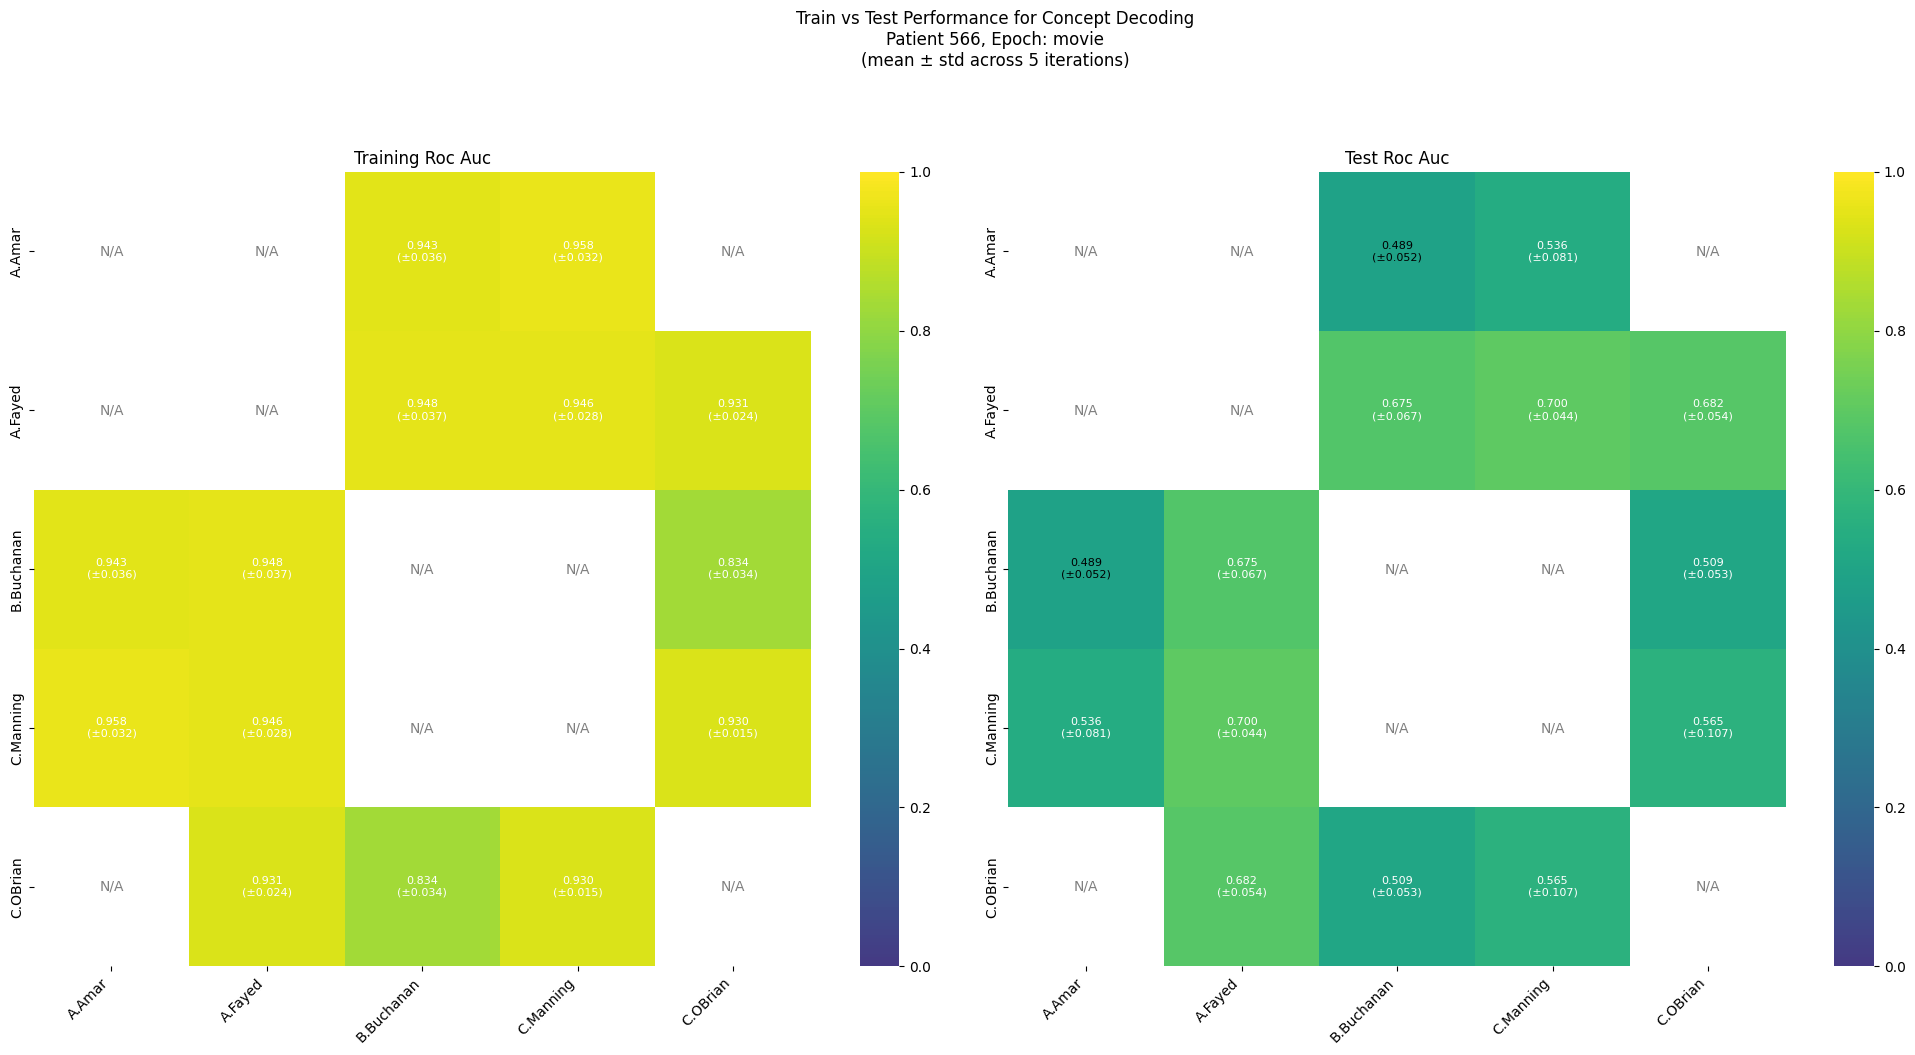

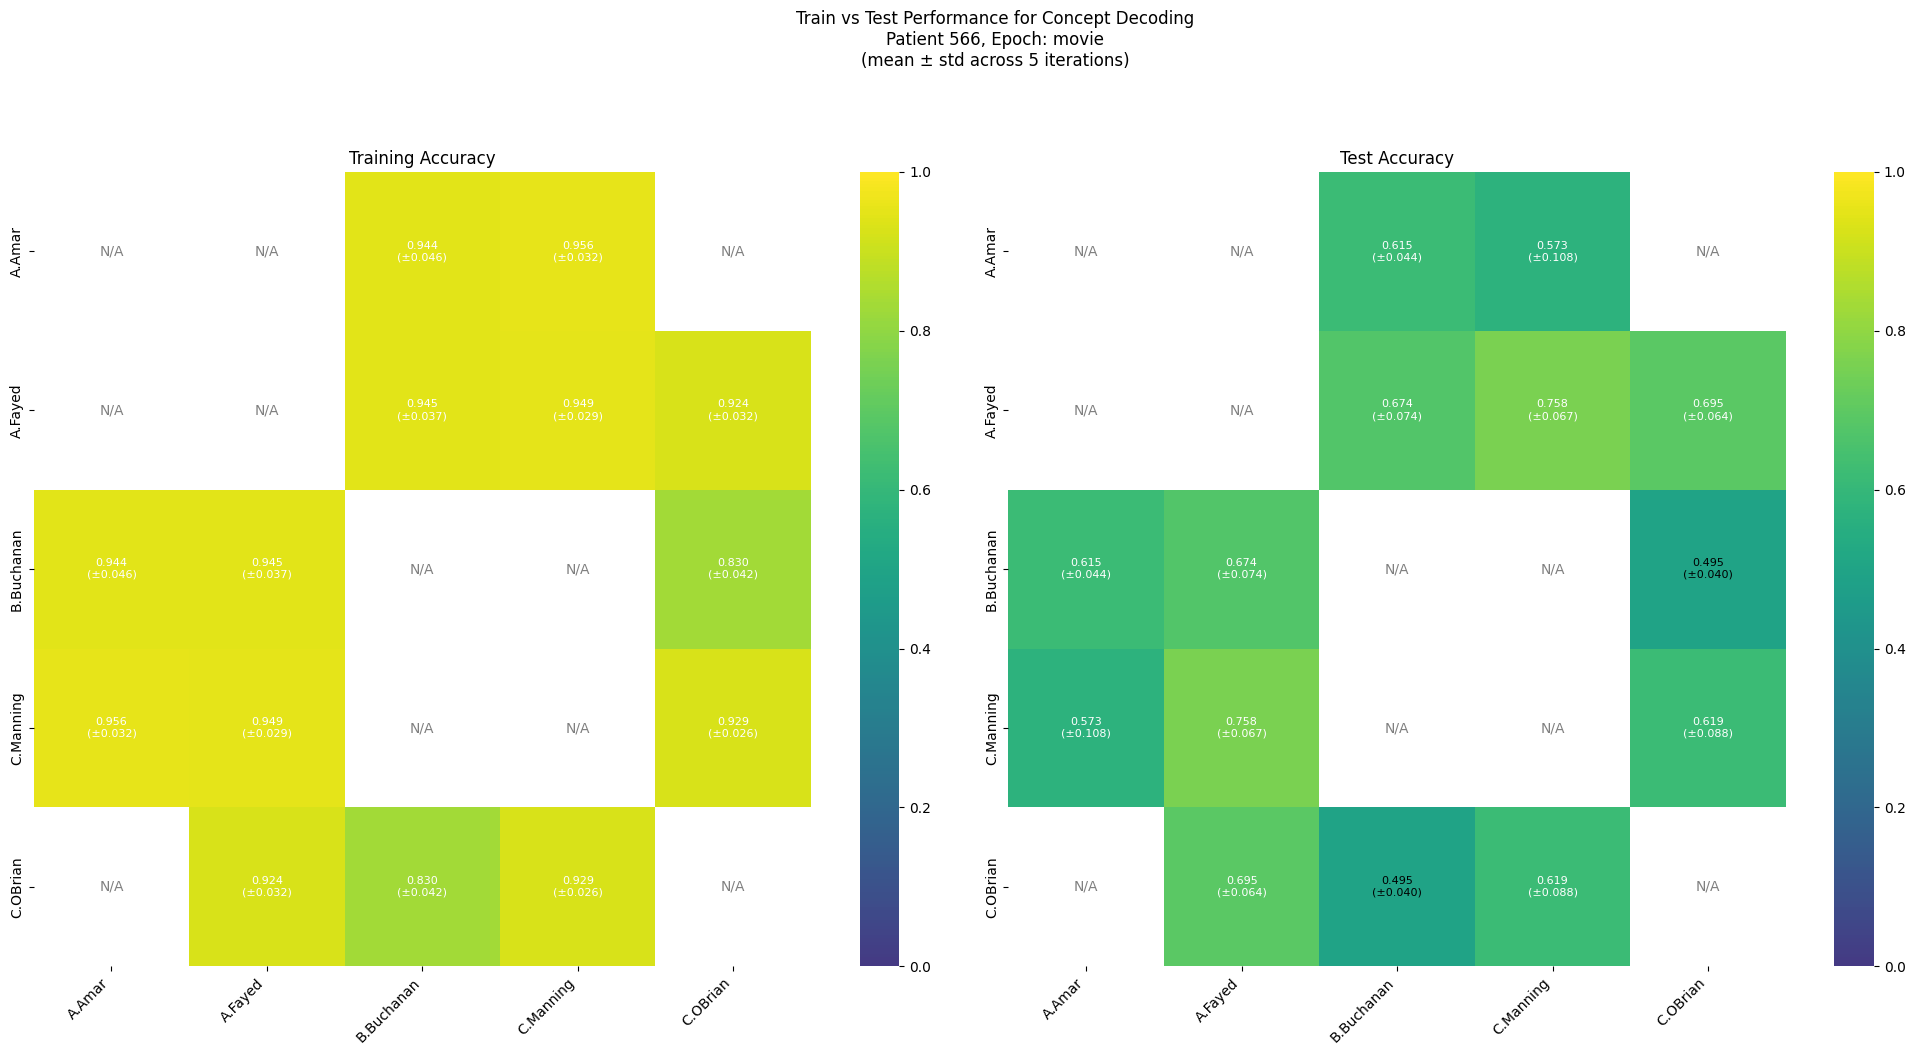

{'train_mean': array([[       nan,        nan, 0.9442623 , 0.95625   ,        nan],
        [       nan,        nan, 0.945     , 0.94909091, 0.92413793],
        [0.9442623 , 0.945     ,        nan,        nan, 0.83043478],
        [0.95625   , 0.94909091,        nan,        nan, 0.92857143],
        [       nan, 0.92413793, 0.83043478, 0.92857143,        nan]]),
 'train_std': array([[       nan,        nan, 0.04590164, 0.03186887,        nan],
        [       nan,        nan, 0.03674235, 0.02909091, 0.03218391],
        [0.04590164, 0.03674235,        nan,        nan, 0.04158941],
        [0.03186887, 0.02909091,        nan,        nan, 0.02555506],
        [       nan, 0.03218391, 0.04158941, 0.02555506,        nan]]),
 'test_mean': array([[       nan,        nan, 0.61481481, 0.57333333,        nan],
        [       nan,        nan, 0.67428571, 0.75833333, 0.69473684],
        [0.61481481, 0.67428571,        nan,        nan, 0.495     ],
        [0.57333333, 0.75833333,        nan,  

In [8]:
normal_manager.plot_train_test_performance_heatmap(metric='test_roc_auc') # Example ROC AUC heatmap - same as accuracy with pseudopops
normal_manager.plot_train_test_performance_heatmap(metric='test_accuracy') # Example Accuracy heatmap

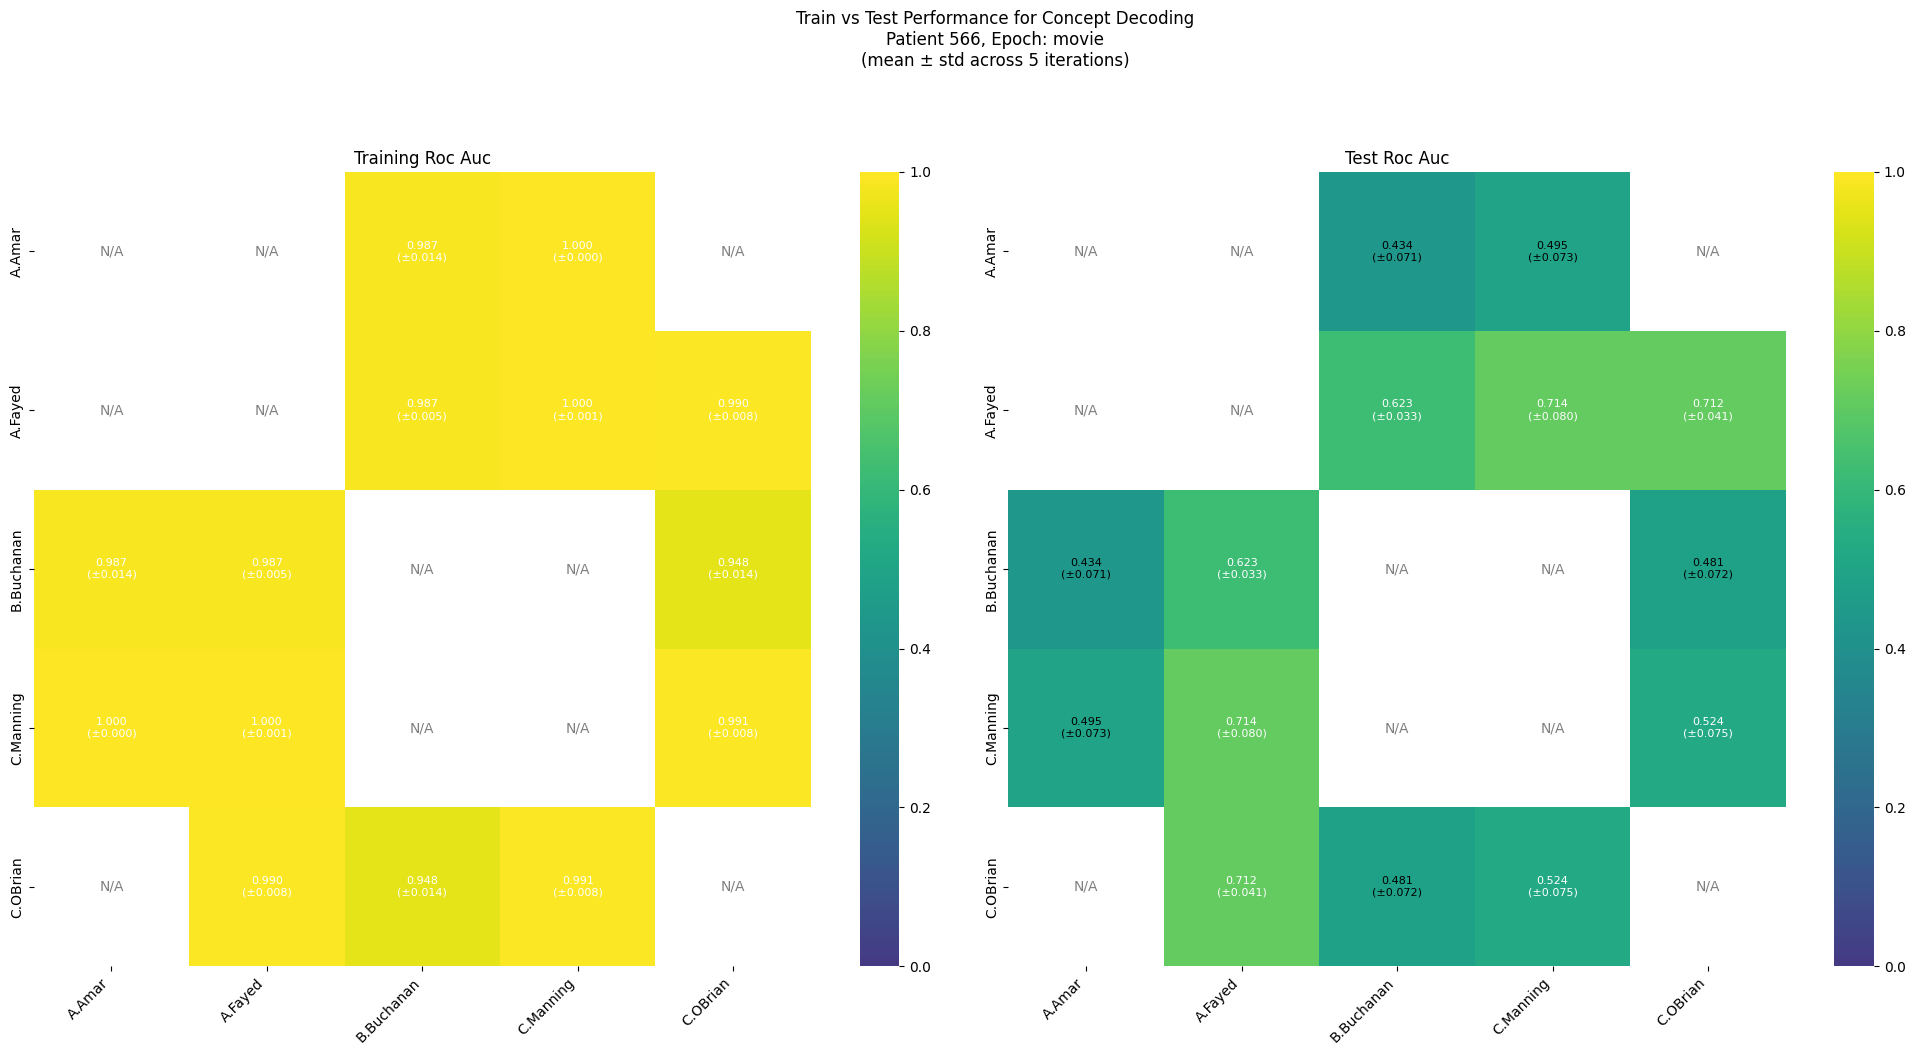

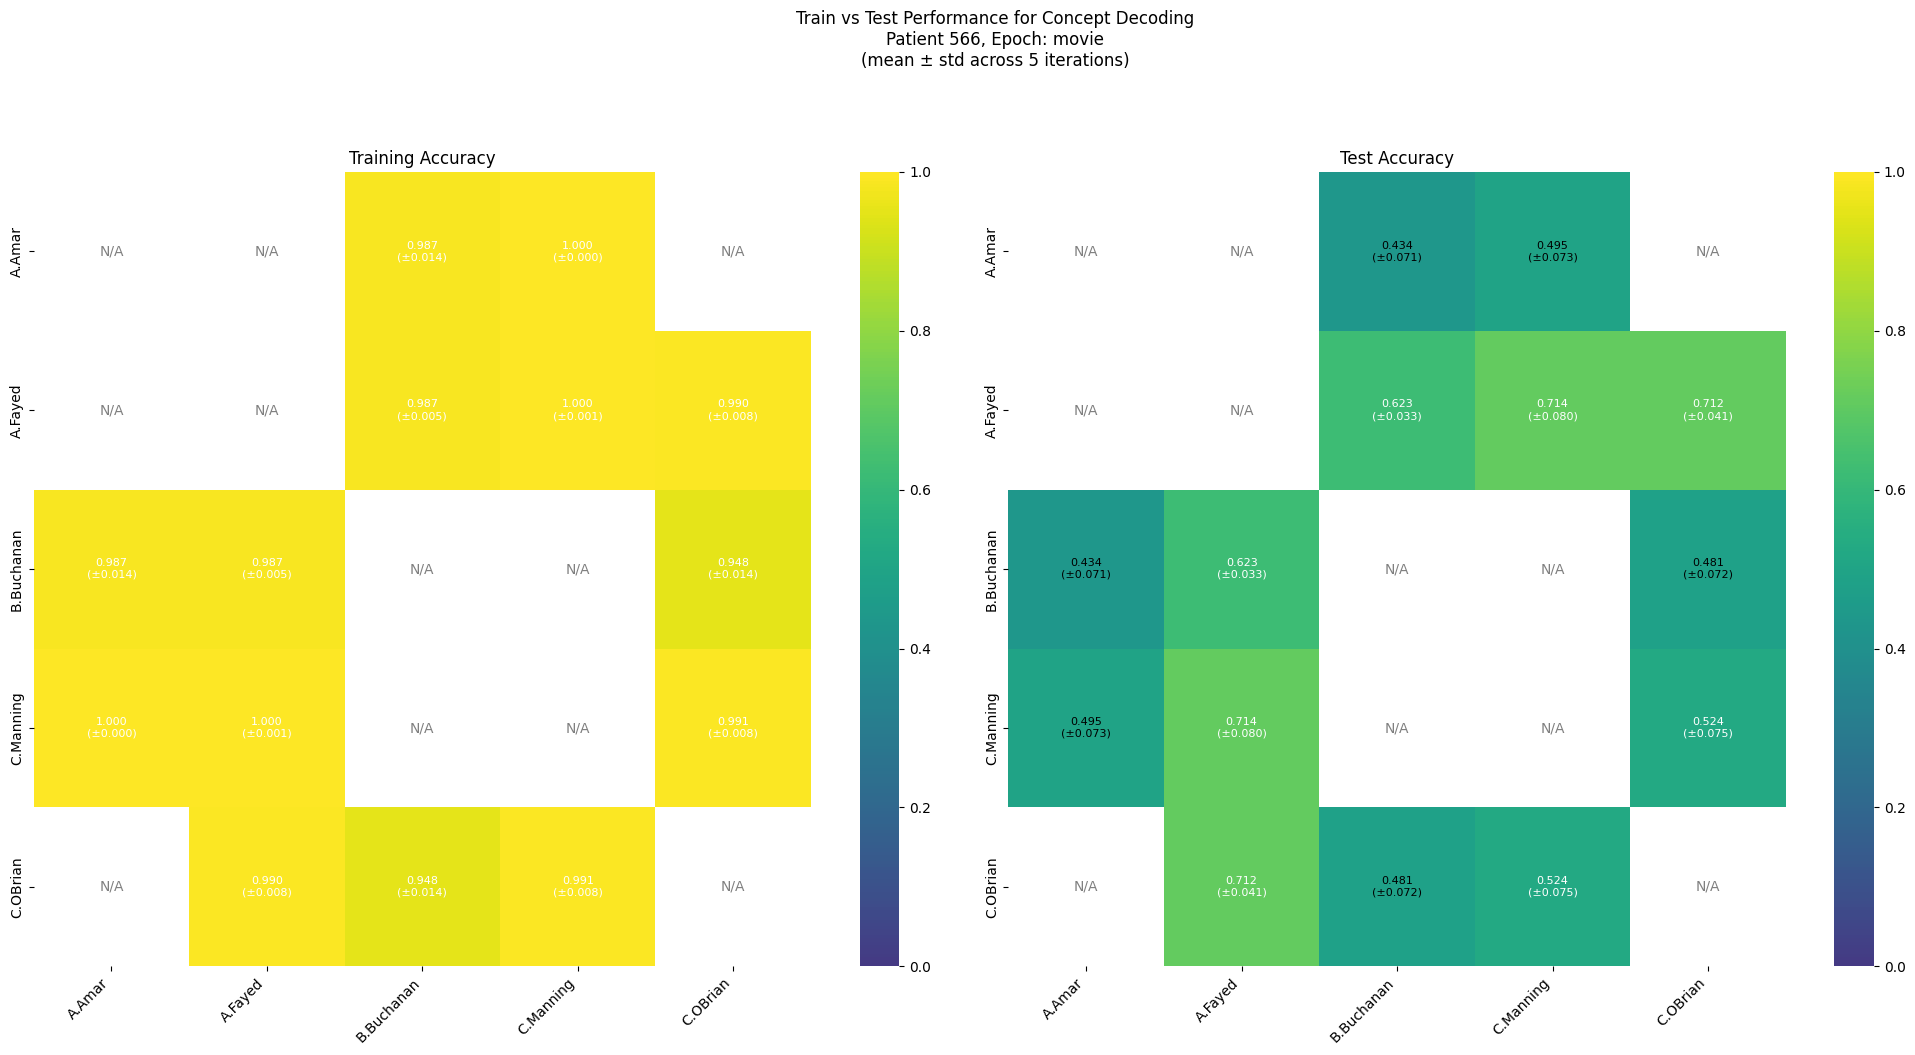

{'train_mean': array([[       nan,        nan, 0.98666667, 1.        ,        nan],
        [       nan,        nan, 0.987     , 0.99966667, 0.99033333],
        [0.98666667, 0.987     ,        nan,        nan, 0.948     ],
        [1.        , 0.99966667,        nan,        nan, 0.99133333],
        [       nan, 0.99033333, 0.948     , 0.99133333,        nan]]),
 'train_std': array([[       nan,        nan, 0.01362188, 0.        ,        nan],
        [       nan,        nan, 0.00487625, 0.00066667, 0.00770281],
        [0.01362188, 0.00487625,        nan,        nan, 0.01380016],
        [0.        , 0.00066667,        nan,        nan, 0.00770281],
        [       nan, 0.00770281, 0.01380016, 0.00770281,        nan]]),
 'test_mean': array([[  nan,   nan, 0.434, 0.495,   nan],
        [  nan,   nan, 0.623, 0.714, 0.712],
        [0.434, 0.623,   nan,   nan, 0.481],
        [0.495, 0.714,   nan,   nan, 0.524],
        [  nan, 0.712, 0.481, 0.524,   nan]]),
 'test_std': array([[       n

In [9]:
pseudo_manager.plot_train_test_performance_heatmap(metric='test_roc_auc') # Example ROC AUC heatmap - same as accuracy with pseudopops
pseudo_manager.plot_train_test_performance_heatmap(metric='test_accuracy') # Example Accuracy heatmap